In data analysis and modeling, missing values and outliers are common issues that can significantly affect the accuracy and validity of the results. Handling these issues properly is essential to ensure that the analysis or modeling is based on reliable data. Missing values can reduce the completeness of a dataset, which can lead to biased or inaccurate results. Outliers, on the other hand, can distort statistical models and lead to poor performance in making predictions. In both cases, handling these issues can improve the accuracy and reliability of the analysis or modeling.

Python pandas is a powerful library that provides a wide range of tools for data manipulation, including handling missing values and outliers. Python pandas provides several methods for handling missing values, such as filling in the missing values with a mean, median, or mode value, or dropping the missing values altogether. Additionally, pandas provides several statistical functions for detecting and handling outliers, such as the interquartile range method and the Z-score method.

In this task, I'm using [Google Colaboratory (CoLab)](https://colab.research.google.com/) as the coding environment. Google Colaboratory is a free Jupyter notebook interactive development environment provide by Google.

Download the [dataset](https://drive.google.com/drive/folders/1LBLc6CO1VKuG1zNIIthZX6-hE8xxk_cn?usp=sharing) to follow along with this process.

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# standardize / convert to z-score
from sklearn.preprocessing import StandardScaler

# ignore warning
import warnings
warnings.filterwarnings('ignore')

## Handling Outliers

### Connect Google Drive to a Google Colab Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read Data from Google Drive

In [ ]:
cust_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_customers/mall_customers_info.csv')
cust_score = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_customers/mall_customers_score.csv')
customer_data_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_customers/customers_data_2.csv')

In [ ]:
cust_info.head()

,CustomerID,Gender,Age,Annual_Income
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17


In [ ]:
cust_score.head()

,CustomerID,Spending Score (1-100)
0,1,39
1,2,81
2,3,6
3,4,77
4,5,40


In [ ]:
customer_data_2.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,151,Male,43,78,17
1,152,Male,39,78,88
2,153,Female,44,78,20
3,154,Female,38,78,76
4,155,Female,47,78,16


### Merge & Concat Data

In [ ]:
customer_data_1 = pd.merge(cust_info,cust_score[['CustomerID', 'Spending Score (1-100)']],how='inner')
customer_data_1.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data_1.shape

(150, 5)

In [ ]:
cust_df = pd.concat([customer_data_1, customer_data_2])
cust_df.shape

(200, 5)

### Outliers Handling with Inter Quartile Range

* Duplicate concatenated dataframe

In [ ]:
df_iqr_outliers = pd.DataFrame.copy(cust_df)

* Create box plot of 'df_iqr_outliers' dataframe

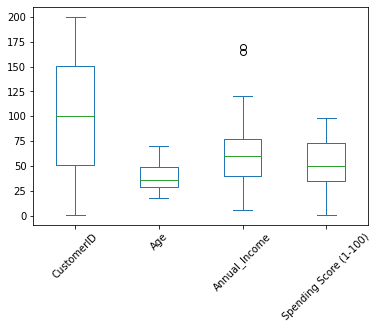

In [ ]:
df_iqr_outliers.plot(kind='box', rot=45)

* Calculate inter quartile range to generate the upper limit and the lower limit

In [ ]:
Q1 = df_iqr_outliers['Annual_Income'].quantile(.25)
Q3 = df_iqr_outliers['Annual_Income'].quantile(.75)
iqr = Q3 - Q1
up_l = Q3 + 1.5 * iqr
lw_l = Q1 - 1.5 * iqr
print("upper limit: {} & lower limit: {}".format(up_l, lw_l))

upper limit: 133.125 & lower limit: -15.875


* Using np.where to get index of value of Annual_Income column that greater than upper limit.

Because there is no minus value in the Annual_Income column, filtering process to imputate outliers value (replace oultiers with other value) only using the upper limit  value

In [ ]:
outliers_index = np.where(df_iqr_outliers['Annual_Income']>up_l)
print(outliers_index)

(array([198, 199]),)


* Filter dataframe using index from np.where

In [ ]:
df_iqr_outliers.iloc[outliers_index]

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
48,199,Male,32,170,70
49,200,Male,30,165,73


* Replace outliers with mean of Annual_Income column (without filtering outliers)

In [ ]:
df_iqr_outliers['Annual_Income'].iloc[outliers_index] = df_iqr_outliers['Annual_Income'].mean()

df_iqr_outliers.iloc[outliers_index]

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
48,199,Male,32,59.815,70
49,200,Male,30,59.815,73


* Create box plot using imputated outliers dataframe

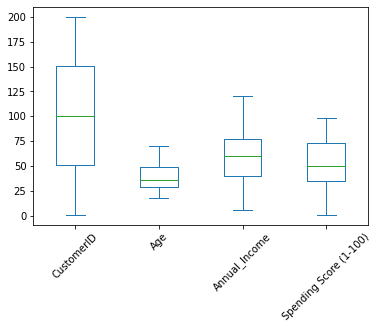

In [ ]:
df_iqr_outliers.plot(kind='box', rot=45)

### Outliers Handling using Z-Score

* Duplicate concatenated dataframe & create box plot

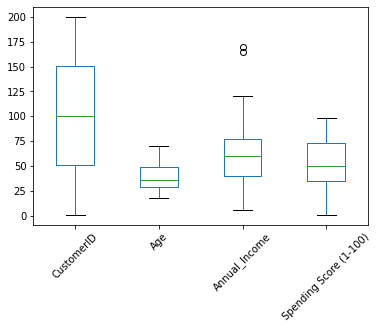

In [ ]:
df_z_score_outliers = pd.DataFrame.copy(cust_df)

df_z_score_outliers.boxplot(rot=45, grid=False)

* Standardizing (convert to z-score)

In [ ]:
scaled_df_z_score_outliers_annual_income = StandardScaler().fit_transform(df_z_score_outliers['Annual_Income'].values.reshape(-1,1))

* Add standardized annual income to df_z_score_outliers dataframe

In [ ]:
df_z_score_outliers['scaled_Annual_Income'] = scaled_df_z_score_outliers_annual_income

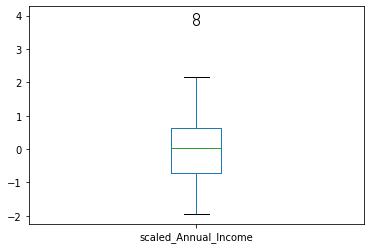

In [ ]:
df_z_score_outliers.boxplot(column='scaled_Annual_Income', grid=False)

In [ ]:
df_z_score_outliers_outliers_removed = df_z_score_outliers.drop(df_z_score_outliers.index[np.where(df_z_score_outliers['scaled_Annual_Income']>3)])
df_z_score_outliers_outliers_removed = df_z_score_outliers_outliers_removed.drop('scaled_Annual_Income', axis=1)

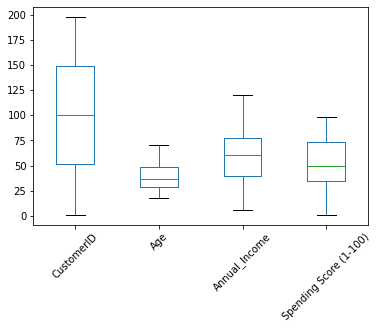

In [ ]:
df_z_score_outliers_outliers_removed.boxplot(rot=45, grid=False)

## Handling Missing Value

#### DataFrame example

In [ ]:
data = pd.DataFrame({ "A" : [4, 5, 7, np.nan, np.nan, 5, 8, np.nan, 3],
                       "B" : [100, 150, 130, 140, 180, 115, 155, 120, 105] })

print(data)

     A    B
0  4.0  100
1  5.0  150
2  7.0  130
3  NaN  140
4  NaN  180
5  5.0  115
6  8.0  155
7  NaN  120
8  3.0  105


#### Fill missing value using mean (or other specific value)

* Duplicate data DataFrame

In [ ]:
data_v1 = pd.DataFrame.copy(data)

* Filter null value using isnull() == True

In [ ]:
data_v1[data_v1["A"].isnull() == True]

,A,B
3,NaN,140
4,NaN,180
7,NaN,120


* Calculate mean from existing data in column A that doesn't have null value

In [ ]:
mean = data_v1["A"][data_v1["A"].isnull() == False].mean()

mean

5.333333333333333

* Assign mean as the replacement of missing values in column A

In [ ]:
data_v1["A"][data_v1["A"].isnull() == True] = mean

# or using fillna()
data_v1["A"].fillna(mean, inplace=True)

print(data_v1)

          A    B
0  4.000000  100
1  5.000000  150
2  7.000000  130
3  5.333333  140
4  5.333333  180
5  5.000000  115
6  8.000000  155
7  5.333333  120
8  3.000000  105


Other value such as median, mode or a specific value can be assign using this method

#### Fill missing value using pandas.fillna methods

* Duplicate data DataFrame & using numpy.where to return the array index of missing values

In [ ]:
data_v2 = pd.DataFrame.copy(data)

np.where(data_v2['A'].isnull())

(array([3, 4, 7]),)

* Using array index that has been generated from previous step to subset null value

In [ ]:
data_v2.iloc[np.where(data_v2['A'].isnull())]

,A,B
3,NaN,140
4,NaN,180
7,NaN,120


> Input limit paramater to limit the maximum number of consecutive NaN values to forward/backward fill and inplace=True to fill in-place. Other paramaters can be found on [pandas documentation](https://pandas.pydata.org/docs/index.html).

In [ ]:
print(data_v2)

     A    B
0  4.0  100
1  5.0  150
2  7.0  130
3  NaN  140
4  NaN  180
5  5.0  115
6  8.0  155
7  NaN  120
8  3.0  105


* Using fillna with 'ffill' or 'pad'

In [ ]:
data_v2.fillna(method="pad")

,A,B
0,4.0,100
1,5.0,150
2,7.0,130
3,7.0,140
4,7.0,180
5,5.0,115
6,8.0,155
7,8.0,120
8,3.0,105


In [ ]:
data_v2.fillna(method="ffill", limit=1)

,A,B
0,4.0,100
1,5.0,150
2,7.0,130
3,7.0,140
4,NaN,180
5,5.0,115
6,8.0,155
7,8.0,120
8,3.0,105


* Using fillna with 'backfill' or 'bfill'

In [ ]:
data_v2.fillna(method="backfill", limit=1)

,A,B
0,4.0,100
1,5.0,150
2,7.0,130
3,NaN,140
4,5.0,180
5,5.0,115
6,8.0,155
7,3.0,120
8,3.0,105


In [ ]:
data_v2.fillna(method="bfill")

,A,B
0,4.0,100
1,5.0,150
2,7.0,130
3,5.0,140
4,5.0,180
5,5.0,115
6,8.0,155
7,3.0,120
8,3.0,105


#### Fill missing value using pandas.interpolate
Fill NaN values using interpolate method (read [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate))

In [ ]:
data_v3 = pd.DataFrame.copy(data)

print(data_v3)

     A    B
0  4.0  100
1  5.0  150
2  7.0  130
3  NaN  140
4  NaN  180
5  5.0  115
6  8.0  155
7  NaN  120
8  3.0  105


In [ ]:
data_v3.interpolate()

,A,B
0,4.000000,100
1,5.000000,150
2,7.000000,130
3,6.333333,140
4,5.666667,180
5,5.000000,115
6,8.000000,155
7,5.500000,120
8,3.000000,105
